In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [4]:
data =yf.download("SPY")
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,24.941402,1003200
1993-02-01,43.96875,44.25000,43.96875,44.25000,25.118786,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,25.171991,201300
1993-02-03,44.40625,44.84375,44.37500,44.81250,25.438087,529400
1993-02-04,44.96875,45.09375,44.46875,45.00000,25.544518,531500


## Create prediction features from diff


In [5]:
data['Open-Close'] = data.Open - data.Close
data['High-Low'] = data.High - data.Low

X = data[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
1993-01-29,0.03125,0.21875
1993-02-01,-0.28125,0.28125
1993-02-02,-0.12500,0.25000
1993-02-03,-0.40625,0.46875
1993-02-04,-0.03125,0.62500


## Define a class label for prediction  -> Buy or not
Given the features condition define if we should Buy or not. We will store 1 for a buy signal and 0 for a no position in y


In [8]:
# Target variables
y = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)

# Print y
y

array([1, 1, 1, ..., 1, 1, 0])

## Split data 

In [10]:
# Define the split percentage
split_percentage = 0.8
split = int(split_percentage*len(data))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]

## SVC model

In [11]:
cls = SVC().fit(X_train, y_train)

In [12]:
y_predict = cls.predict(X_test)

In [13]:
# train and test accuracy
accuracy_test = accuracy_score(y_test, y_predict)

print('Accuracy:{: .2f}%'.format(accuracy_test*100))

Accuracy: 53.42%


## Test Cumulative returns

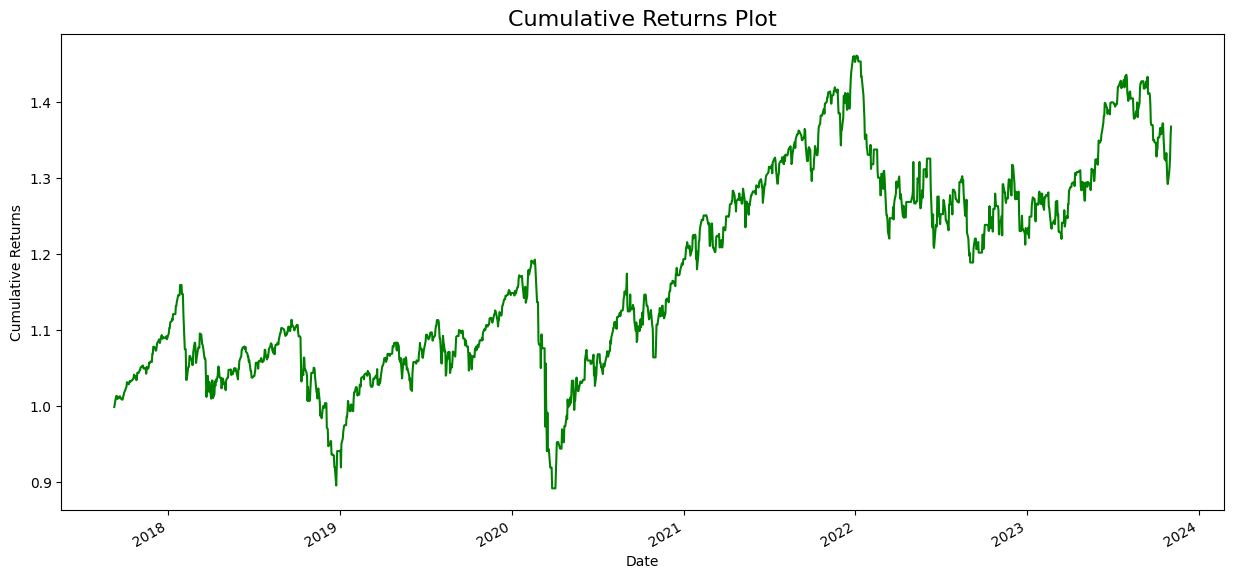

In [15]:
# Predicted Signal
data['Predicted_Signal'] = cls.predict(X)

# Calculate daily returns
data['Returns'] = data.Close.pct_change()

# Calculate strategy returns
data['Strategy_Returns'] = data.Returns * data.Predicted_Signal.shift(1)

# Calculate geometric returns
data['cumulative_returns'] = (data.Strategy_Returns.iloc[split:]+1).cumprod()

# Set the title and axis labels
plt.title("Cumulative Returns Plot", fontsize=16)
plt.ylabel("Cumulative Returns")
plt.xlabel("Date")

# Plot geometric returns
data['cumulative_returns'].plot(figsize=(15, 7),color='g')

plt.show()